In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#step 1: sample dataset (10 records, 3 features)
data = np.array([
    [2.5, 2.4, 1.2],
    [0.5, 0.7, 0.3],
    [2.2, 2.9, 1.4],
    [1.9, 2.2, 1.1],
    [3.1, 3.0, 1.7],
    [2.3, 2.7, 1.5],
    [2.0, 1.6, 0.9],
    [1.0, 1.1, 0.4],
    [1.5, 1.6, 0.8],
    [1.1, 0.9, 0.2]
])
df =pd.DataFrame(data, columns=["X", "Y", "Z"])

In [ ]:
#standardization using pandas
df_standardized = (df - df.mean()) / df.std()

In [ ]:
#covariance matrix
cov_matrix = np.cov(df_standardized.T)
print("Covariance Matrix:")
print(cov_matrix)

Covariance Matrix:
[[1.         0.92592927 0.93688744]
 [0.92592927 1.         0.98192228]
 [0.93688744 0.98192228 1.        ]]


In [ ]:
#define eigen values and eigen vectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [ ]:
#sort eigenvalues and eigen vectors
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

In [ ]:
#select top 2 eigenvectors
eigen_vector_subset = sorted_eigenvectors[:, :2]

In [ ]:
#project data to new basis
reduced_data = df_standardized.to_numpy().dot(eigen_vector_subset)
reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])

In [ ]:
#output
print("Reduced Data:", reduced_df)

Reduced Data:         PC1       PC2
0  1.114772  0.287461
1 -2.502976 -0.278755
2  1.461615 -0.429478
3  0.430754 -0.162708
4  2.517452  0.260130
5  1.508478 -0.278933
6 -0.129861  0.401224
7 -1.754639 -0.043244
8 -0.604269 -0.055335
9 -2.041325  0.299640


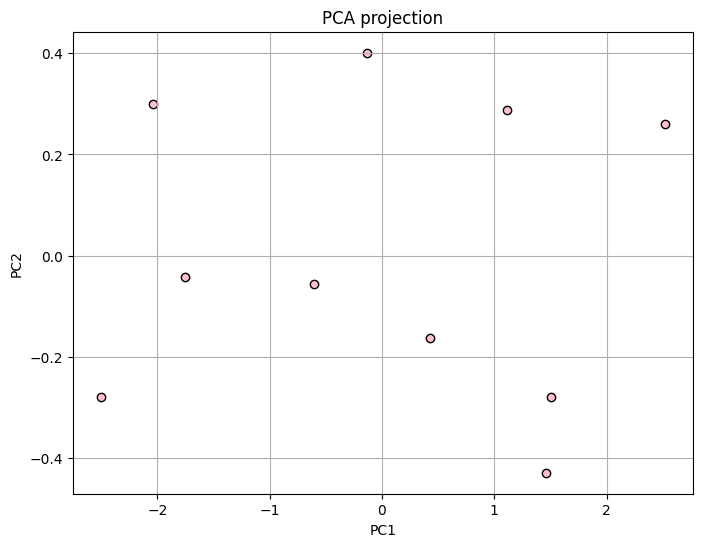

In [ ]:
#scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(reduced_df['PC1'], reduced_df['PC2'], color = 'pink', edgecolor = 'k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA projection')
plt.grid(True)
plt.show()